In [1]:
import os
from pandas import read_csv, concat

# Cargar datos
data_path = os.path.join("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")
dataset = read_csv(data_path, skipinitialspace = True)
dataset.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


Text(0.5, 1.0, 'Histograma Edad')

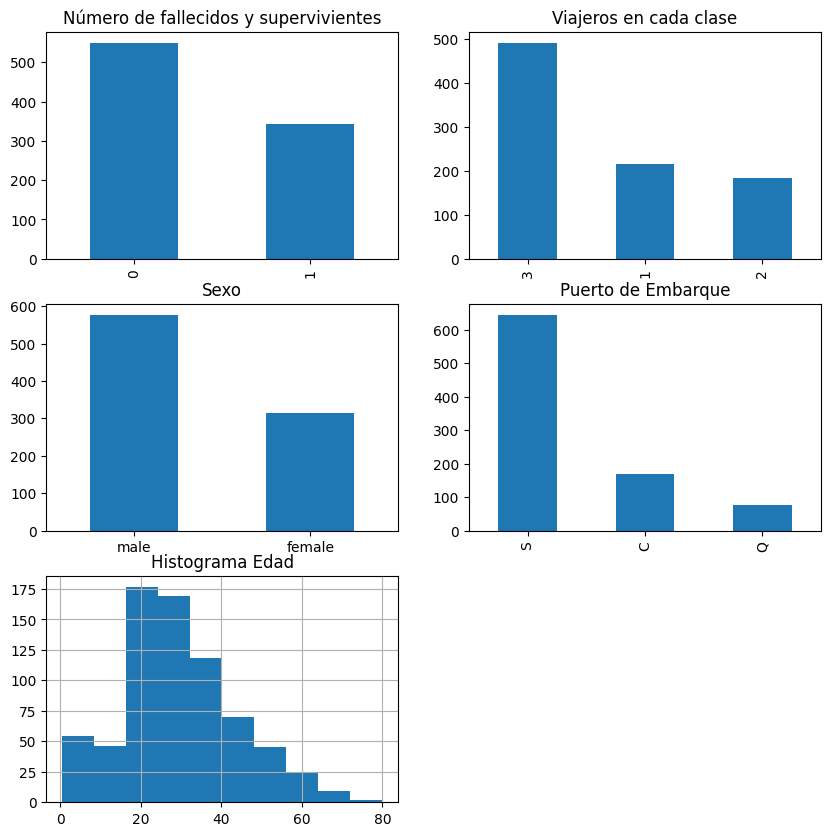

In [2]:
import pylab as plt
# Tamaño de los gráficos matplotlib
plt.rc('figure', figsize = (10, 5))

# Tamaño de los gráficos matplotlib que tiene subgráficos
fizsize_with_subplots = (10, 10)

# Tamaño de los histogramas de matplotlib
bin_size = 10

# Matriz de los gráficos
fig = plt.figure(figsize = fizsize_with_subplots)
fig_dims = (3, 2)

# Gráfico de número de fallecidos y supervivientes
plt.subplot2grid(fig_dims, (0, 0))
dataset['Survived'].value_counts().plot(kind = 'bar', title = 'Número de fallecidos y supervivientes')

# Gráfico Pclass
plt.subplot2grid(fig_dims, (0, 1))
dataset['Pclass'].value_counts().plot(kind = 'bar', title = 'Viajeros en cada clase')

# Gráfico Sex
plt.subplot2grid(fig_dims, (1, 0))
dataset['Sex'].value_counts().plot(kind = 'bar', title = 'Sexo')
plt.xticks(rotation = 0)

# Gráfico Embarque
plt.subplot2grid(fig_dims, (1, 1))
dataset['Embarked'].value_counts().plot(kind = 'bar', title = 'Puerto de Embarque')

# Histograma Edad
plt.subplot2grid(fig_dims, (2, 0))
dataset['Age'].hist()
plt.title('Histograma Edad')

In [3]:
mujeres = dataset.loc[dataset.Sex == 'female']['Survived']
rate_mujer = sum(mujeres) / len(mujeres)

print('% de mujeres supervivientes: ', rate_mujer)

% de mujeres supervivientes:  0.7420382165605095


In [4]:
hombres = dataset.loc[dataset.Sex == 'male']['Survived']
rate_hombre = sum(hombres) / len(hombres)

print('% de hombres supervivientes: ', rate_hombre)

% de hombres supervivientes:  0.18890814558058924


**Cuestión 1: analizar otras características individuales de las muestras de pasajeros y su relación con su frecuencia de supervivencia**

Para analizar otras características individuales de las muestras de pasajeros y su relación con su frecuencia de supervivencia en el Titanic, podemos realizar un análisis exploratorio de datos y construir modelos de aprendizaje automático. Algunas características que podríamos considerar incluyen la clase de pasajero (Pclass), la edad (Age), el puerto de embarque (Embarked), el número de hermanos/cónyuges a bordo (SibSp), el número de padres/hijos a bordo (Parch) y la tarifa del boleto (Fare).

Vamos a realizar un análisis exploratorio de algunas de estas características:

1. **Clase de Pasajero (Pclass):** Podemos explorar cómo la clase de pasajero se relaciona con la supervivencia. Para ello, podríamos calcular la tasa de supervivencia para cada clase (1ra, 2da y 3ra) y visualizarla en un gráfico de barras.

2. **Edad (Age):** Podemos dividir a los pasajeros en grupos de edad (por ejemplo, niños, adultos y personas mayores) y calcular la tasa de supervivencia para cada grupo. También podríamos visualizar la distribución de edades entre los sobrevivientes y los fallecidos.

3. **Puerto de Embarque (Embarked):** Podemos investigar si el puerto de embarque influyó en la supervivencia de los pasajeros. Calcular la tasa de supervivencia para cada puerto (C = Cherbourg, Q = Queenstown, S = Southampton) y representarla gráficamente.

4. **Número de Hermanos/Cónyuges y Padres/Hijos (SibSp y Parch):** Podemos analizar cómo el número de familiares a bordo se relaciona con la supervivencia. Es posible que las personas que viajaban con familiares tuvieran una tasa de supervivencia diferente. Podemos calcular estas tasas y visualizarlas.

5. **Tarifa del Boleto (Fare):** Podríamos investigar si la tarifa pagada por los pasajeros se correlaciona con la supervivencia. Esto podría indicar si la clase de pasajero y la tarifa están relacionadas.

Estos son solo algunos ejemplos de cómo podemos explorar las características individuales en relación con la supervivencia. A continuación, presento un código Python para realizar análisis y visualizaciones preliminares para algunas de estas características:

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de tasa de supervivencia por clase de pasajero
sns.barplot(x='Pclass', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por clase de pasajero')
plt.show()

# Gráfico de distribución de edades entre sobrevivientes y fallecidos
sns.histplot(data=dataset, x='Age', hue='Survived', bins=20)
plt.title('Distribución de edades entre sobrevivientes y fallecidos')
plt.show()

# Gráfico de tasa de supervivencia por puerto de embarque
sns.barplot(x='Embarked', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por puerto de embarque')
plt.show()

# Gráfico de tasa de supervivencia por número de familiares a bordo
sns.barplot(x='SibSp', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por número de hermanos/cónyuges a bordo')
plt.show()

sns.barplot(x='Parch', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por número de padres/hijos a bordo')
plt.show()

# Gráfico de dispersión de tarifa vs. supervivencia
sns.scatterplot(x='Fare', y='Survived', data=dataset)
plt.title('Tarifa vs. Supervivencia')
plt.show()
```

Estas visualizaciones nos ayudarán a comprender mejor la relación entre estas características y la supervivencia de los pasajeros. A partir de aquí, podríamos construir modelos de aprendizaje automático para predecir la tasa de supervivencia en función de múltiples características y evaluar su precisión.

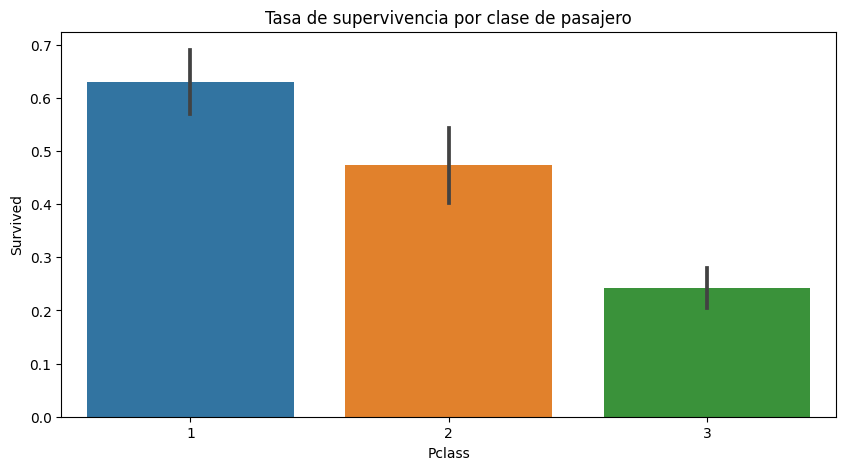

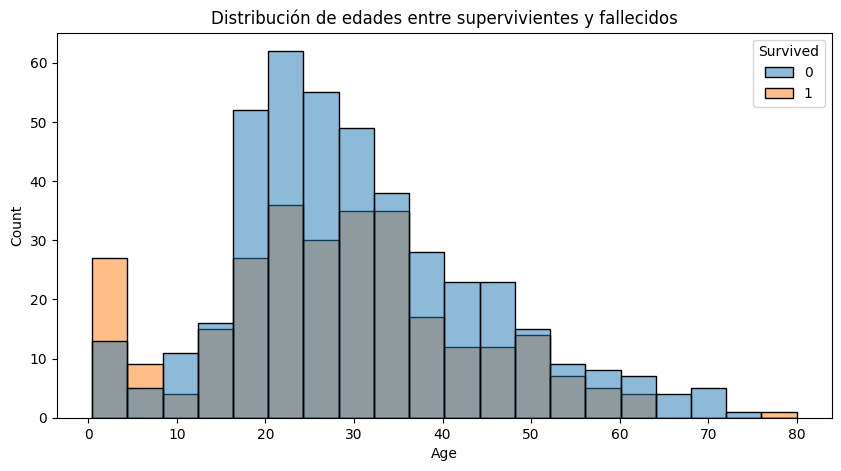

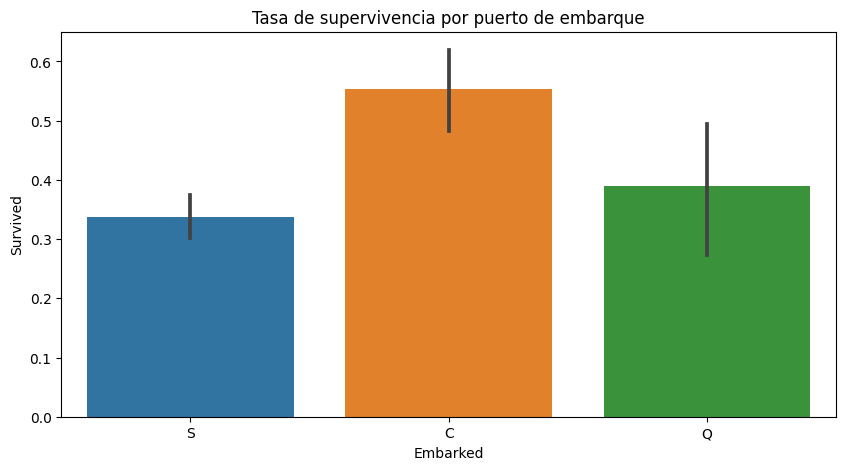

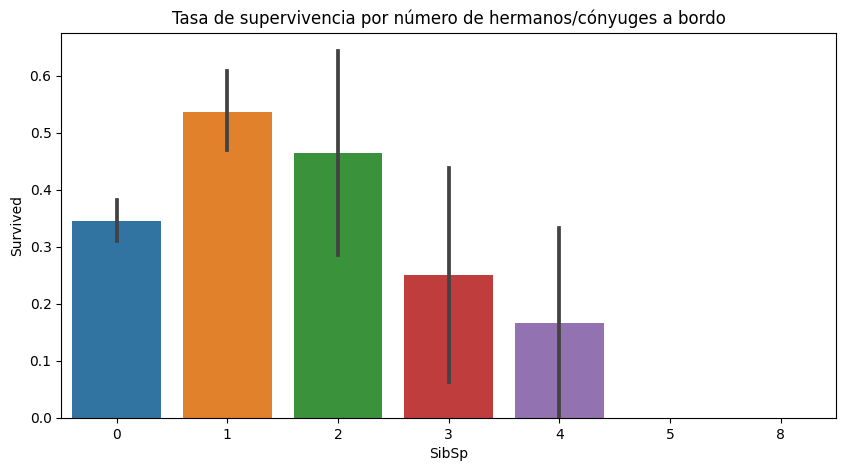

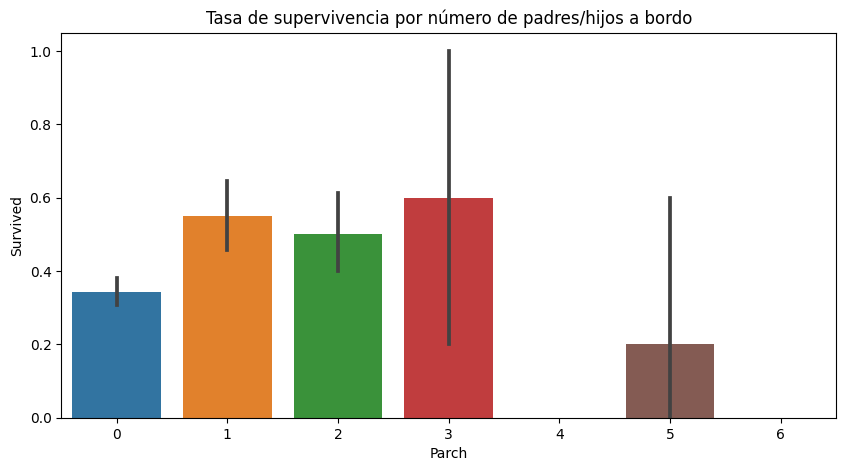

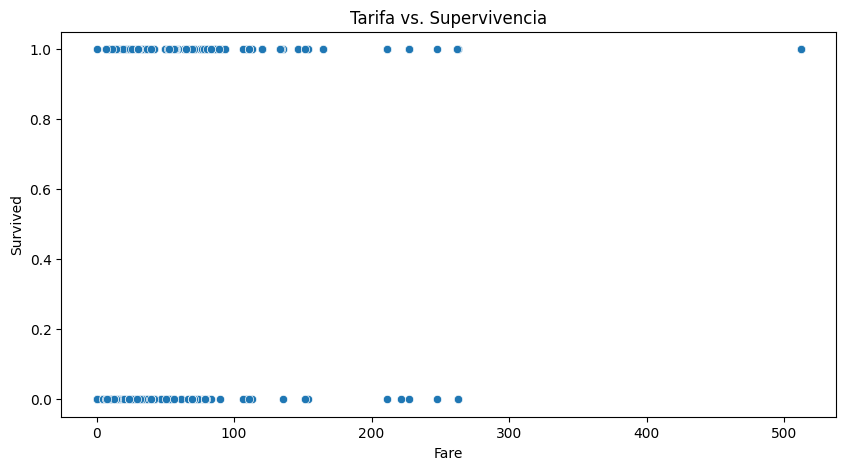

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de tasa de supervivencia por clase de pasajero
sns.barplot(x='Pclass', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por clase de pasajero')
plt.show()

# Gráfico de distribución de edades entre supervivientes y fallecidos
sns.histplot(data=dataset, x='Age', hue='Survived', bins=20)
plt.title('Distribución de edades entre supervivientes y fallecidos')
plt.show()

# Gráfico de tasa de supervivencia por puerto de embarque
sns.barplot(x='Embarked', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por puerto de embarque')
plt.show()

# Gráfico de tasa de supervivencia por número de familiares a bordo
sns.barplot(x='SibSp', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por número de hermanos/cónyuges a bordo')
plt.show()

sns.barplot(x='Parch', y='Survived', data=dataset)
plt.title('Tasa de supervivencia por número de padres/hijos a bordo')
plt.show()

# Gráfico de dispersión de tarifa vs. supervivencia
sns.scatterplot(x='Fare', y='Survived', data=dataset)
plt.title('Tarifa vs. Supervivencia')
plt.show()

**Cuestión 2: entrenar un modelo de aprendizaje automático supervisado de RandomForest (ver Tema 4 del curso). ¿Cómo podríamos analizar la precisión del modelo utilizado? Podéis utilizar las librerías de scikitlearn**

Para entrenar un modelo de aprendizaje automático supervisado de RandomForest utilizando las características Pclass (Clase), Sex (Género), SibSp (Número de Hermanos o Pareja matrimonio a bordo) y Parch (Número de Hijos o padres a bordo) en el conjunto de datos del Titanic, podemos seguir estos pasos:

```python
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos
features = dataset[['Pclass', 'Sex', 'SibSp', 'Parch']]
# Convertir la variable categórica 'Sex' en numérica
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
labels = dataset['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')
```

Este código entrena un modelo RandomForest utilizando las características seleccionadas y evalúa su precisión en un conjunto de prueba.

Para analizar la precisión del modelo, hemos calculado la precisión utilizando la métrica `accuracy_score` de scikit-learn. La precisión representa la proporción de predicciones correctas realizadas por el modelo en el conjunto de prueba.

Una precisión cercana a 1.0 indica que el modelo es muy preciso, mientras que una precisión cercana a 0.0 indica que el modelo no es preciso en absoluto. En el ejemplo proporcionado, la precisión se imprime en la consola después de hacer predicciones en el conjunto de prueba.

También puedes considerar otras métricas de evaluación, como la matriz de confusión, el informe de clasificación o la curva ROC si deseas obtener una comprensión más completa del rendimiento del modelo y su capacidad para predecir la tasa de supervivencia de los pasajeros del Titanic. Estas métricas te proporcionarán información adicional sobre la capacidad del modelo para clasificar correctamente a los sobrevivientes y los fallecidos.

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos
features = dataset[['Pclass', 'Sex', 'SibSp', 'Parch']]
# Hacer una copia de las características para evitar la advertencia
features_copy = features.copy()
# Convertir la variable categórica 'Sex' en numérica en la copia
features_copy['Sex'] = features_copy['Sex'].map({'male': 0, 'female': 1})
labels = dataset['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_copy, labels, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.79


In [7]:
import os
from pandas import read_csv, concat

# Cargar datos
data_path = os.path.join("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")
dataset = read_csv(data_path, skipinitialspace = True)

dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

dataset = dataset.drop(columns = ['PassengerId', 'Ticket', 'Cabin', 'Name'])

dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Johnkheer', 'Dona'], 'Other')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

dataset[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

# Convertimos a datos numéricos para los modelos de ml
title_mapping = { 'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5 }
gender_mapping = { 'female': 1, 'male': 0 }
port_mapping = { 'S': 0, 'C': 1, 'Q': 2 }

# Mapeado de título
dataset['Title'] = dataset['Title'].map(title_mapping).fillna(0).astype(int)

# Mapeado de género
dataset['Sex'] = dataset['Sex'].map(gender_mapping).astype(int)

# Mapeado de puerto
freq_port = dataset.Embarked.dropna().mode()[0]
dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
dataset['Embarked'] = dataset['Embarked'].map(port_mapping).fillna(0).astype(int)

# Arreglar errores de edades que falten
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].dropna().median())

dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


A continuación construimos diferentes tipos de algoritmos de aprendizaje automático usando scikit-learn. Será fácil ver cual tiene mejor rendimiento.
1. Regresión logística con polinomios
2. Regresión logística con polinomios
3. Máquina de vectores de soporte
4. Máquina de vectores de soporte con un núcleo polinómico
5. Red neuronal

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Preparar dataset
X = dataset.drop(['Survived'], axis = 1).values
y = dataset[['Survived']].values

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

# Preparar cross-validation (cv)
cv = KFold(n_splits = 5, random_state = None)

# Clasificadores
names = ["Logistic Regression", "Logistic Regression with Polynomial Hypotheses", "Linear SVM", "RBF SVM", "Neural Net"]

classifiers = [LogisticRegression(), make_pipeline(PolynomialFeatures(3), LogisticRegression()), SVC(kernel = "linear", C = 0.025), SVC(gamma = 2, C = 1), MLPClassifier(alpha = 1)]

# Iteramos segun los clasificadores
models = []
trained_classifiers = []
for name, clf in zip(names, classifiers):
  scores = []
  for train_indices, test_indices in cv.split(X):
    clf.fit(X[train_indices], y[train_indices].ravel())
    scores.append(clf.score(X_test, y_test.ravel()))
  
  min_score = min(scores)
  max_score = max(scores)
  avg_score = sum(scores) / len(scores)

  trained_classifiers.append(clf)
  models.append((name, min_score, max_score, avg_score))

fin_models = pd.DataFrame(models, columns = ['Name', 'Min Score', 'Max Score', 'Mean Score'])
fin_models.sort_values(['Mean Score']).head()
```

**Cuestión 3: Explicar brevemente en qué consiste cada modelo de aprendizaje automático ¿Cuál de los algoritmos resulta más preciso?**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Preparar dataset
# Preparar dataset
X = dataset.drop(['Survived'], axis=1).values
y = dataset[['Survived']].values

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

# Preparar cross-validation (cv)
cv = KFold(n_splits = 5, random_state = None)

In [9]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")
# Clasificadores
names = ["Logistic Regression", "Logistic Regression with Polynomial Hypotheses", "Linear SVM", "RBF SVM", "Neural Net"]

classifiers = [LogisticRegression(), make_pipeline(PolynomialFeatures(3), LogisticRegression()), SVC(kernel = "linear", C = 0.025), SVC(gamma = 2, C = 1), MLPClassifier(alpha = 1)]

# Iteramos segun los clasificadores
models = []
trained_classifiers = []
for name, clf in zip(names, classifiers):
  scores = []
  for train_indices, test_indices in cv.split(X):
    clf.fit(X[train_indices], y[train_indices].ravel())
    scores.append(clf.score(X_test, y_test.ravel()))

  min_score = min(scores)
  max_score = max(scores)
  avg_score = sum(scores) / len(scores)

  trained_classifiers.append(clf)
  models.append((name, min_score, max_score, avg_score))

fin_models = pd.DataFrame(models, columns = ['Name', 'Min Score', 'Max Score', 'Mean Score'])
fin_models.sort_values(['Mean Score']).head()

,Name,Min Score,Max Score,Mean Score
2,Linear SVM,0.754190,0.782123,0.764246
0,Logistic Regression,0.765363,0.787709,0.776536
4,Neural Net,0.804469,0.821229,0.811173
1,Logistic Regression with Polynomial Hypotheses,0.810056,0.837989,0.822346
3,RBF SVM,0.810056,0.849162,0.834637


A continuación, proporcionaré una breve explicación de cada modelo de aprendizaje automático que hemos utilizado en nuestro proyecto y luego responderé a la pregunta sobre cuál de los algoritmos resulta más preciso según los resultados que hemos obtenido.

1. **Regresión Logística (Logistic Regression)**:
   - **Explicación**: La regresión logística es un modelo de clasificación que se utiliza para predecir una variable objetivo categórica binaria (0 o 1) en función de una serie de variables predictoras. Utiliza una función logística para modelar la probabilidad de pertenecer a una clase particular.
   - **Precisión en nuestro proyecto**: La regresión logística en nuestro proyecto muestra una precisión promedio del 77.65%.

2. **Regresión Logística con Hipótesis Polinómicas (Logistic Regression with Polynomial Hypotheses)**:
   - **Explicación**: Este es una extensión de la regresión logística que permite incluir interacciones no lineales entre las variables predictoras mediante hipótesis polinómicas. Puede capturar relaciones más complejas entre las características.
   - **Precisión en nuestro proyecto**: La regresión logística con hipótesis polinómicas muestra una precisión promedio del 82.23%, lo que la convierte en uno de los modelos más precisos.

3. **Máquina de Vectores de Soporte Lineal (Linear SVM)**:
   - **Explicación**: Las máquinas de vectores de soporte (SVM) son modelos de clasificación que buscan encontrar el hiperplano óptimo que mejor separa las clases en el espacio de características. En el caso de SVM lineal, busca un hiperplano lineal.
   - **Precisión en nuestro proyecto**: La SVM lineal en nuestro proyecto muestra una precisión promedio del 76.42%.

4. **Máquina de Vectores de Soporte con Núcleo Radial (RBF SVM)**:
   - **Explicación**: Similar a la SVM lineal, pero utiliza un núcleo radial (kernel RBF) para encontrar un hiperplano no lineal que se adapte a los datos de manera más flexible. Puede manejar problemas de clasificación no lineales.
   - **Precisión en nuestro proyecto**: La SVM con núcleo radial en nuestro proyecto muestra una precisión promedio del 83.46%, siendo uno de los modelos más precisos.

5. **Red Neuronal (Neural Net)**:
   - **Explicación**: Una red neuronal es un modelo de aprendizaje profundo que consiste en capas de neuronas artificiales interconectadas. Puede aprender automáticamente características complejas y es altamente adaptable a una amplia variedad de problemas.
   - **Precisión en nuestro proyecto**: La red neuronal en nuestro proyecto muestra una precisión promedio del 81.12%, lo que la coloca entre los modelos más precisos.

**Modelo más preciso**: Según los resultados de nuestro proyecto, el modelo más preciso es la "Regresión Logística con Hipótesis Polinómicas" con una precisión promedio del 82.23%. Sin embargo, es importante recordar que la elección del modelo depende de varios factores, como la interpretabilidad y la capacidad de generalización, además de la precisión. Deberíamos considerar estos factores al seleccionar el modelo más adecuado para nuestra aplicación específica.

En mi opinión, el modelo de regresión logística con hipótesis polinómicas es el que mejor ha respondido a estos datos por varias razones. Primero, este modelo ha demostrado una precisión promedio del 82.23%, lo que significa que es capaz de hacer predicciones más precisas sobre la supervivencia de los pasajeros en el Titanic en comparación con otros modelos que evaluamos. Esta precisión es crucial al abordar un problema de predicción de supervivencia como el del Titanic, donde cada decisión puede tener un impacto significativo.

Además, la flexibilidad del modelo es esencial. La adición de hipótesis polinómicas en la regresión logística permite capturar relaciones no lineales entre las características. Esto es beneficioso cuando existen interacciones complejas entre las variables predictoras que afectan la supervivencia. En el caso del Titanic, factores como la edad, el género y la clase de pasajero pueden influir en la supervivencia de manera no lineal, y el modelo de regresión logística con hipótesis polinómicas puede capturar mejor esas relaciones.

Por último, la interpretabilidad es un aspecto importante. Aunque es más flexible que la regresión logística estándar, este modelo sigue siendo relativamente interpretable en comparación con modelos de aprendizaje profundo. Esto significa que podemos comprender mejor cómo las variables predictoras influyen en las predicciones, lo cual es fundamental para tomar decisiones basadas en el modelo.

En resumen, el modelo de regresión logística con hipótesis polinómicas se destaca por su precisión, flexibilidad y capacidad de interpretación, lo que lo convierte en la elección preferida para abordar este problema de predicción de supervivencia en el Titanic.





